In [1]:
#Let's start with importing necessary libraries

import pandas as pd 
import numpy as np 
from sklearn.preprocessing import StandardScaler 
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, confusion_matrix, roc_curve, roc_auc_score, precision_score
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px

import warnings
warnings.filterwarnings('ignore')

In [2]:
data = pd.read_csv("vaccineprediction.csv")
data.head()

,unique_id,h1n1_worry,h1n1_awareness,antiviral_medication,contact_avoidance,bought_face_mask,wash_hands_frequently,avoid_large_gatherings,reduced_outside_home_cont,avoid_touch_face,...,race,sex,income_level,marital_status,housing_status,employment,census_msa,no_of_adults,no_of_children,h1n1_vaccine
0,0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,...,White,Female,Below Poverty,Not Married,Own,Not in Labor Force,Non-MSA,0.0,0.0,0
1,1,3.0,2.0,0.0,1.0,0.0,1.0,0.0,1.0,1.0,...,White,Male,Below Poverty,Not Married,Rent,Employed,"MSA, Not Principle City",0.0,0.0,0
2,2,1.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,...,White,Male,"<= $75,000, Above Poverty",Not Married,Own,Employed,"MSA, Not Principle City",2.0,0.0,0
3,3,1.0,1.0,0.0,1.0,0.0,1.0,1.0,0.0,0.0,...,White,Female,Below Poverty,Not Married,Rent,Not in Labor Force,"MSA, Principle City",0.0,0.0,0
4,4,2.0,1.0,0.0,1.0,0.0,1.0,1.0,0.0,1.0,...,White,Female,"<= $75,000, Above Poverty",Married,Own,Employed,"MSA, Not Principle City",1.0,0.0,0


In [3]:
data.shape

(26707, 34)

In [4]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 26707 entries, 0 to 26706
Data columns (total 34 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   unique_id                  26707 non-null  int64  
 1   h1n1_worry                 26615 non-null  float64
 2   h1n1_awareness             26591 non-null  float64
 3   antiviral_medication       26636 non-null  float64
 4   contact_avoidance          26499 non-null  float64
 5   bought_face_mask           26688 non-null  float64
 6   wash_hands_frequently      26665 non-null  float64
 7   avoid_large_gatherings     26620 non-null  float64
 8   reduced_outside_home_cont  26625 non-null  float64
 9   avoid_touch_face           26579 non-null  float64
 10  dr_recc_h1n1_vacc          24547 non-null  float64
 11  dr_recc_seasonal_vacc      24547 non-null  float64
 12  chronic_medic_condition    25736 non-null  float64
 13  cont_child_undr_6_mnths    25887 non-null  flo

In [5]:
data.isnull().sum()

unique_id                        0
h1n1_worry                      92
h1n1_awareness                 116
antiviral_medication            71
contact_avoidance              208
bought_face_mask                19
wash_hands_frequently           42
avoid_large_gatherings          87
reduced_outside_home_cont       82
avoid_touch_face               128
dr_recc_h1n1_vacc             2160
dr_recc_seasonal_vacc         2160
chronic_medic_condition        971
cont_child_undr_6_mnths        820
is_health_worker               804
has_health_insur             12274
is_h1n1_vacc_effective         391
is_h1n1_risky                  388
sick_from_h1n1_vacc            395
is_seas_vacc_effective         462
is_seas_risky                  514
sick_from_seas_vacc            537
age_bracket                      0
qualification                 1407
race                             0
sex                              0
income_level                  4423
marital_status                1408
housing_status      

##if the % of missing values are more than 70 % percent tan we need to drop the entire column otherwise we need to impute it 

Explotatory data analyise 

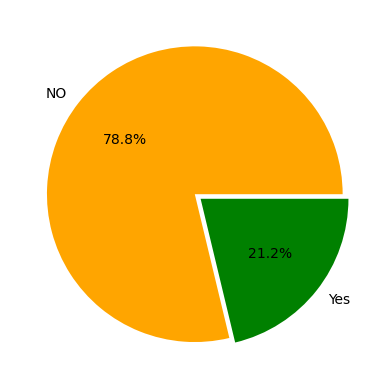

In [6]:
# Let's create a Pie-Chart to graphically represent the class distribution

import plotly.graph_objects as go
explode=[.0,.05]
labels = ["NO","Yes"]
mycolors = ["orange","Green"]
sizes=data["h1n1_vaccine"].value_counts().values
plt.pie(sizes,explode=explode,labels= labels,colors=mycolors,autopct="%1.1f%%")
plt.show()

# based on my Hypothensis Race,marital status,housing status,Qualification ,sex,

In [7]:
##lets check the string values 
data_obj= data.select_dtypes(include=object)
data_obj

,age_bracket,qualification,race,sex,income_level,marital_status,housing_status,employment,census_msa
0,55 - 64 Years,< 12 Years,White,Female,Below Poverty,Not Married,Own,Not in Labor Force,Non-MSA
1,35 - 44 Years,12 Years,White,Male,Below Poverty,Not Married,Rent,Employed,"MSA, Not Principle City"
2,18 - 34 Years,College Graduate,White,Male,"<= $75,000, Above Poverty",Not Married,Own,Employed,"MSA, Not Principle City"
3,65+ Years,12 Years,White,Female,Below Poverty,Not Married,Rent,Not in Labor Force,"MSA, Principle City"
4,45 - 54 Years,Some College,White,Female,"<= $75,000, Above Poverty",Married,Own,Employed,"MSA, Not Principle City"
...,...,...,...,...,...,...,...,...,...
26702,65+ Years,Some College,White,Female,"<= $75,000, Above Poverty",Not Married,Own,Not in Labor Force,Non-MSA
26703,18 - 34 Years,College Graduate,White,Male,"<= $75,000, Above Poverty",Not Married,Rent,Employed,"MSA, Principle City"
26704,55 - 64 Years,Some College,White,Female,NaN,Not Married,Own,NaN,"MSA, Not Principle City"
26705,18 - 34 Years,Some College,Hispanic,Female,"<= $75,000, Above Poverty",Married,Rent,Employed,Non-MSA


In [8]:
data_obj.columns

Index(['age_bracket', 'qualification', 'race', 'sex', 'income_level',
       'marital_status', 'housing_status', 'employment', 'census_msa'],
      dtype='object')

In [9]:
## label Encding 
from sklearn.preprocessing import LabelEncoder
le= LabelEncoder()
cols=['age_bracket', 'qualification', 'race', 'sex', 'income_level','marital_status', 'housing_status', 'employment', 'census_msa']
for i in cols:
     data[i]=le.fit_transform(data[i])

In [10]:
data.head()

,unique_id,h1n1_worry,h1n1_awareness,antiviral_medication,contact_avoidance,bought_face_mask,wash_hands_frequently,avoid_large_gatherings,reduced_outside_home_cont,avoid_touch_face,...,race,sex,income_level,marital_status,housing_status,employment,census_msa,no_of_adults,no_of_children,h1n1_vaccine
0,0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,...,3,0,2,1,0,1,2,0.0,0.0,0
1,1,3.0,2.0,0.0,1.0,0.0,1.0,0.0,1.0,1.0,...,3,1,2,1,1,0,0,0.0,0.0,0
2,2,1.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,...,3,1,0,1,0,0,0,2.0,0.0,0
3,3,1.0,1.0,0.0,1.0,0.0,1.0,1.0,0.0,0.0,...,3,0,2,1,1,1,1,0.0,0.0,0
4,4,2.0,1.0,0.0,1.0,0.0,1.0,1.0,0.0,1.0,...,3,0,0,0,0,0,0,1.0,0.0,0


In [11]:
## missing values treatment 
data['h1n1_worry'].fillna(data['h1n1_worry'].mode()[0], inplace = True)
data['h1n1_awareness'].fillna(data['h1n1_awareness'].mode()[0], inplace = True)
data['antiviral_medication'].fillna(data['antiviral_medication'].mode()[0], inplace = True)
data['contact_avoidance'].fillna(data['contact_avoidance'].mode()[0], inplace = True)
data['bought_face_mask'].fillna(data['bought_face_mask'].mode()[0], inplace = True)

data['wash_hands_frequently'].fillna(data['wash_hands_frequently'].mode()[0], inplace = True)
data['avoid_large_gatherings'].fillna(data['avoid_large_gatherings'].mode()[0], inplace = True)
data['reduced_outside_home_cont'].fillna(data['reduced_outside_home_cont'].mode()[0], inplace = True)
data['avoid_touch_face'].fillna(data['avoid_touch_face'].mode()[0], inplace = True)
data['dr_recc_h1n1_vacc'].fillna(data['dr_recc_h1n1_vacc'].mode()[0], inplace = True)

data['dr_recc_seasonal_vacc'].fillna(data['dr_recc_seasonal_vacc'].mode()[0], inplace = True)
data['h1n1_awareness'].fillna(data['h1n1_awareness'].mode()[0], inplace = True)
data['chronic_medic_condition'].fillna(data['chronic_medic_condition'].mode()[0], inplace = True)
data['cont_child_undr_6_mnths'].fillna(data['cont_child_undr_6_mnths'].mode()[0], inplace = True)
data['is_health_worker'].fillna(data['is_health_worker'].mode()[0], inplace = True)

data['has_health_insur'].fillna(data['has_health_insur'].mode()[0], inplace = True)
data['is_h1n1_vacc_effective'].fillna(data['is_h1n1_vacc_effective'].mode()[0], inplace = True)
data['is_h1n1_risky'].fillna(data['is_h1n1_risky'].mode()[0], inplace = True)
data['sick_from_h1n1_vacc'].fillna(data['sick_from_h1n1_vacc'].mode()[0], inplace = True)
data['is_seas_vacc_effective'].fillna(data['is_seas_vacc_effective'].mode()[0], inplace = True)

data['is_seas_risky'].fillna(data['is_seas_risky'].mode()[0], inplace = True)
data['is_h1n1_vacc_effective'].fillna(data['is_h1n1_vacc_effective'].mode()[0], inplace = True)
data['is_h1n1_risky'].fillna(data['is_h1n1_risky'].mode()[0], inplace = True)
data['sick_from_h1n1_vacc'].fillna(data['sick_from_h1n1_vacc'].mode()[0], inplace = True)
data['no_of_adults'].fillna(data['no_of_adults'].mode()[0], inplace = True)
data['no_of_children'].fillna(data['no_of_children'].mode()[0], inplace = True)
data['sick_from_seas_vacc'].fillna(data['sick_from_seas_vacc'].mode()[0], inplace = True)

In [12]:
data.isnull().sum()

unique_id                    0
h1n1_worry                   0
h1n1_awareness               0
antiviral_medication         0
contact_avoidance            0
bought_face_mask             0
wash_hands_frequently        0
avoid_large_gatherings       0
reduced_outside_home_cont    0
avoid_touch_face             0
dr_recc_h1n1_vacc            0
dr_recc_seasonal_vacc        0
chronic_medic_condition      0
cont_child_undr_6_mnths      0
is_health_worker             0
has_health_insur             0
is_h1n1_vacc_effective       0
is_h1n1_risky                0
sick_from_h1n1_vacc          0
is_seas_vacc_effective       0
is_seas_risky                0
sick_from_seas_vacc          0
age_bracket                  0
qualification                0
race                         0
sex                          0
income_level                 0
marital_status               0
housing_status               0
employment                   0
census_msa                   0
no_of_adults                 0
no_of_ch

all data  is now in 0 or 1

In [13]:
## CHECKING OUR HYPOTHESIS WITH CHI - SQUARE TEST

In [14]:
from sklearn.feature_selection import chi2



In [15]:
x1 = data.drop("h1n1_vaccine",axis=1)
y1= data.h1n1_vaccine

In [16]:
# return f score and p value
f_score = chi2(x1,y1)
f_score

(array([1.27892347e+03, 2.01358892e+02, 1.11808117e+02, 4.11096977e+01,
        1.59504077e+01, 1.23284462e+02, 2.58568639e+01, 5.61483986e+00,
        8.64154522e+00, 4.30653783e+01, 3.30781019e+03, 8.92499456e+02,
        1.72886102e+02, 1.09342915e+02, 6.72405011e+02, 3.04643931e+00,
        4.95639893e+02, 1.91415123e+03, 1.15654361e+02, 2.43320341e+02,
        1.22231992e+03, 2.01581768e+00, 4.37694949e+01, 1.24151591e+01,
        1.49313640e+01, 6.77656778e+00, 5.19724564e+00, 4.50617033e+01,
        2.79256058e+01, 1.27635738e+01, 3.83927863e-03, 9.07646362e-01,
        2.84434376e-01]),
 array([4.30008095e-280, 1.05510630e-045, 3.93620890e-026, 1.43920477e-010,
        6.50237709e-005, 1.20823440e-028, 3.67694855e-007, 1.78090085e-002,
        3.28582623e-003, 5.29408499e-011, 0.00000000e+000, 4.19137320e-196,
        1.73317808e-039, 1.36504702e-025, 2.99632034e-148, 8.09143610e-002,
        8.44597327e-110, 0.00000000e+000, 5.65791678e-027, 7.42579815e-055,
        8.60189894

Chi-Square (Test for Independance)
Null Hypothesis: Variables are independent on each other
Alternate Hypothesis: Variables are dependent on each other
If p_value is <= 0.05 then we can reject the null hypothesis else we can accept the null hypothesis.
#less than equal to we want reject one that are independent

In [17]:
p_values = pd.Series(f_score[1],index = x1.columns)
p_values

unique_id                    4.300081e-280
h1n1_worry                    1.055106e-45
h1n1_awareness                3.936209e-26
antiviral_medication          1.439205e-10
contact_avoidance             6.502377e-05
bought_face_mask              1.208234e-28
wash_hands_frequently         3.676949e-07
avoid_large_gatherings        1.780901e-02
reduced_outside_home_cont     3.285826e-03
avoid_touch_face              5.294085e-11
dr_recc_h1n1_vacc             0.000000e+00
dr_recc_seasonal_vacc        4.191373e-196
chronic_medic_condition       1.733178e-39
cont_child_undr_6_mnths       1.365047e-25
is_health_worker             2.996320e-148
has_health_insur              8.091436e-02
is_h1n1_vacc_effective       8.445973e-110
is_h1n1_risky                 0.000000e+00
sick_from_h1n1_vacc           5.657917e-27
is_seas_vacc_effective        7.425798e-55
is_seas_risky                8.601899e-268
sick_from_seas_vacc           1.556674e-01
age_bracket                   3.694183e-11
qualificati

In [18]:
irr_cols =[]

for x in p_values.index:
    if p_values[x] <=0.05:
        print(x,"-Reject the null hypothensis")
    else:
        print(x,"Accept the null hypothesis")
        irr_cols.append(x)
irr_cols        

unique_id -Reject the null hypothensis
h1n1_worry -Reject the null hypothensis
h1n1_awareness -Reject the null hypothensis
antiviral_medication -Reject the null hypothensis
contact_avoidance -Reject the null hypothensis
bought_face_mask -Reject the null hypothensis
wash_hands_frequently -Reject the null hypothensis
avoid_large_gatherings -Reject the null hypothensis
reduced_outside_home_cont -Reject the null hypothensis
avoid_touch_face -Reject the null hypothensis
dr_recc_h1n1_vacc -Reject the null hypothensis
dr_recc_seasonal_vacc -Reject the null hypothensis
chronic_medic_condition -Reject the null hypothensis
cont_child_undr_6_mnths -Reject the null hypothensis
is_health_worker -Reject the null hypothensis
has_health_insur Accept the null hypothesis
is_h1n1_vacc_effective -Reject the null hypothensis
is_h1n1_risky -Reject the null hypothensis
sick_from_h1n1_vacc -Reject the null hypothensis
is_seas_vacc_effective -Reject the null hypothensis
is_seas_risky -Reject the null hypothens

['has_health_insur',
 'sick_from_seas_vacc',
 'census_msa',
 'no_of_adults',
 'no_of_children']

In [19]:
# drop the cols that not needed.
data.drop('unique_id', axis = 1, inplace = True)
data.drop('sick_from_seas_vacc', axis = 1, inplace = True)
data.drop('census_msa', axis = 1, inplace = True)
data.drop('has_health_insur', axis = 1, inplace = True)
data.drop('no_of_adults', axis = 1, inplace = True)
data.drop('no_of_children', axis = 1, inplace = True)

In [20]:
data.head()

,h1n1_worry,h1n1_awareness,antiviral_medication,contact_avoidance,bought_face_mask,wash_hands_frequently,avoid_large_gatherings,reduced_outside_home_cont,avoid_touch_face,dr_recc_h1n1_vacc,...,is_seas_risky,age_bracket,qualification,race,sex,income_level,marital_status,housing_status,employment,h1n1_vaccine
0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0,...,1.0,3,1,3,0,2,1,0,1,0
1,3.0,2.0,0.0,1.0,0.0,1.0,0.0,1.0,1.0,0.0,...,2.0,1,0,3,1,2,1,1,0,0
2,1.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,...,1.0,0,2,3,1,0,1,0,0,0
3,1.0,1.0,0.0,1.0,0.0,1.0,1.0,0.0,0.0,0.0,...,4.0,4,0,3,0,2,1,1,1,0
4,2.0,1.0,0.0,1.0,0.0,1.0,1.0,0.0,1.0,0.0,...,1.0,2,3,3,0,0,0,0,0,0


## Analyizing the Data using Bi - Variable Analysis

<Axes: xlabel='wash_hands_frequently', ylabel='count'>

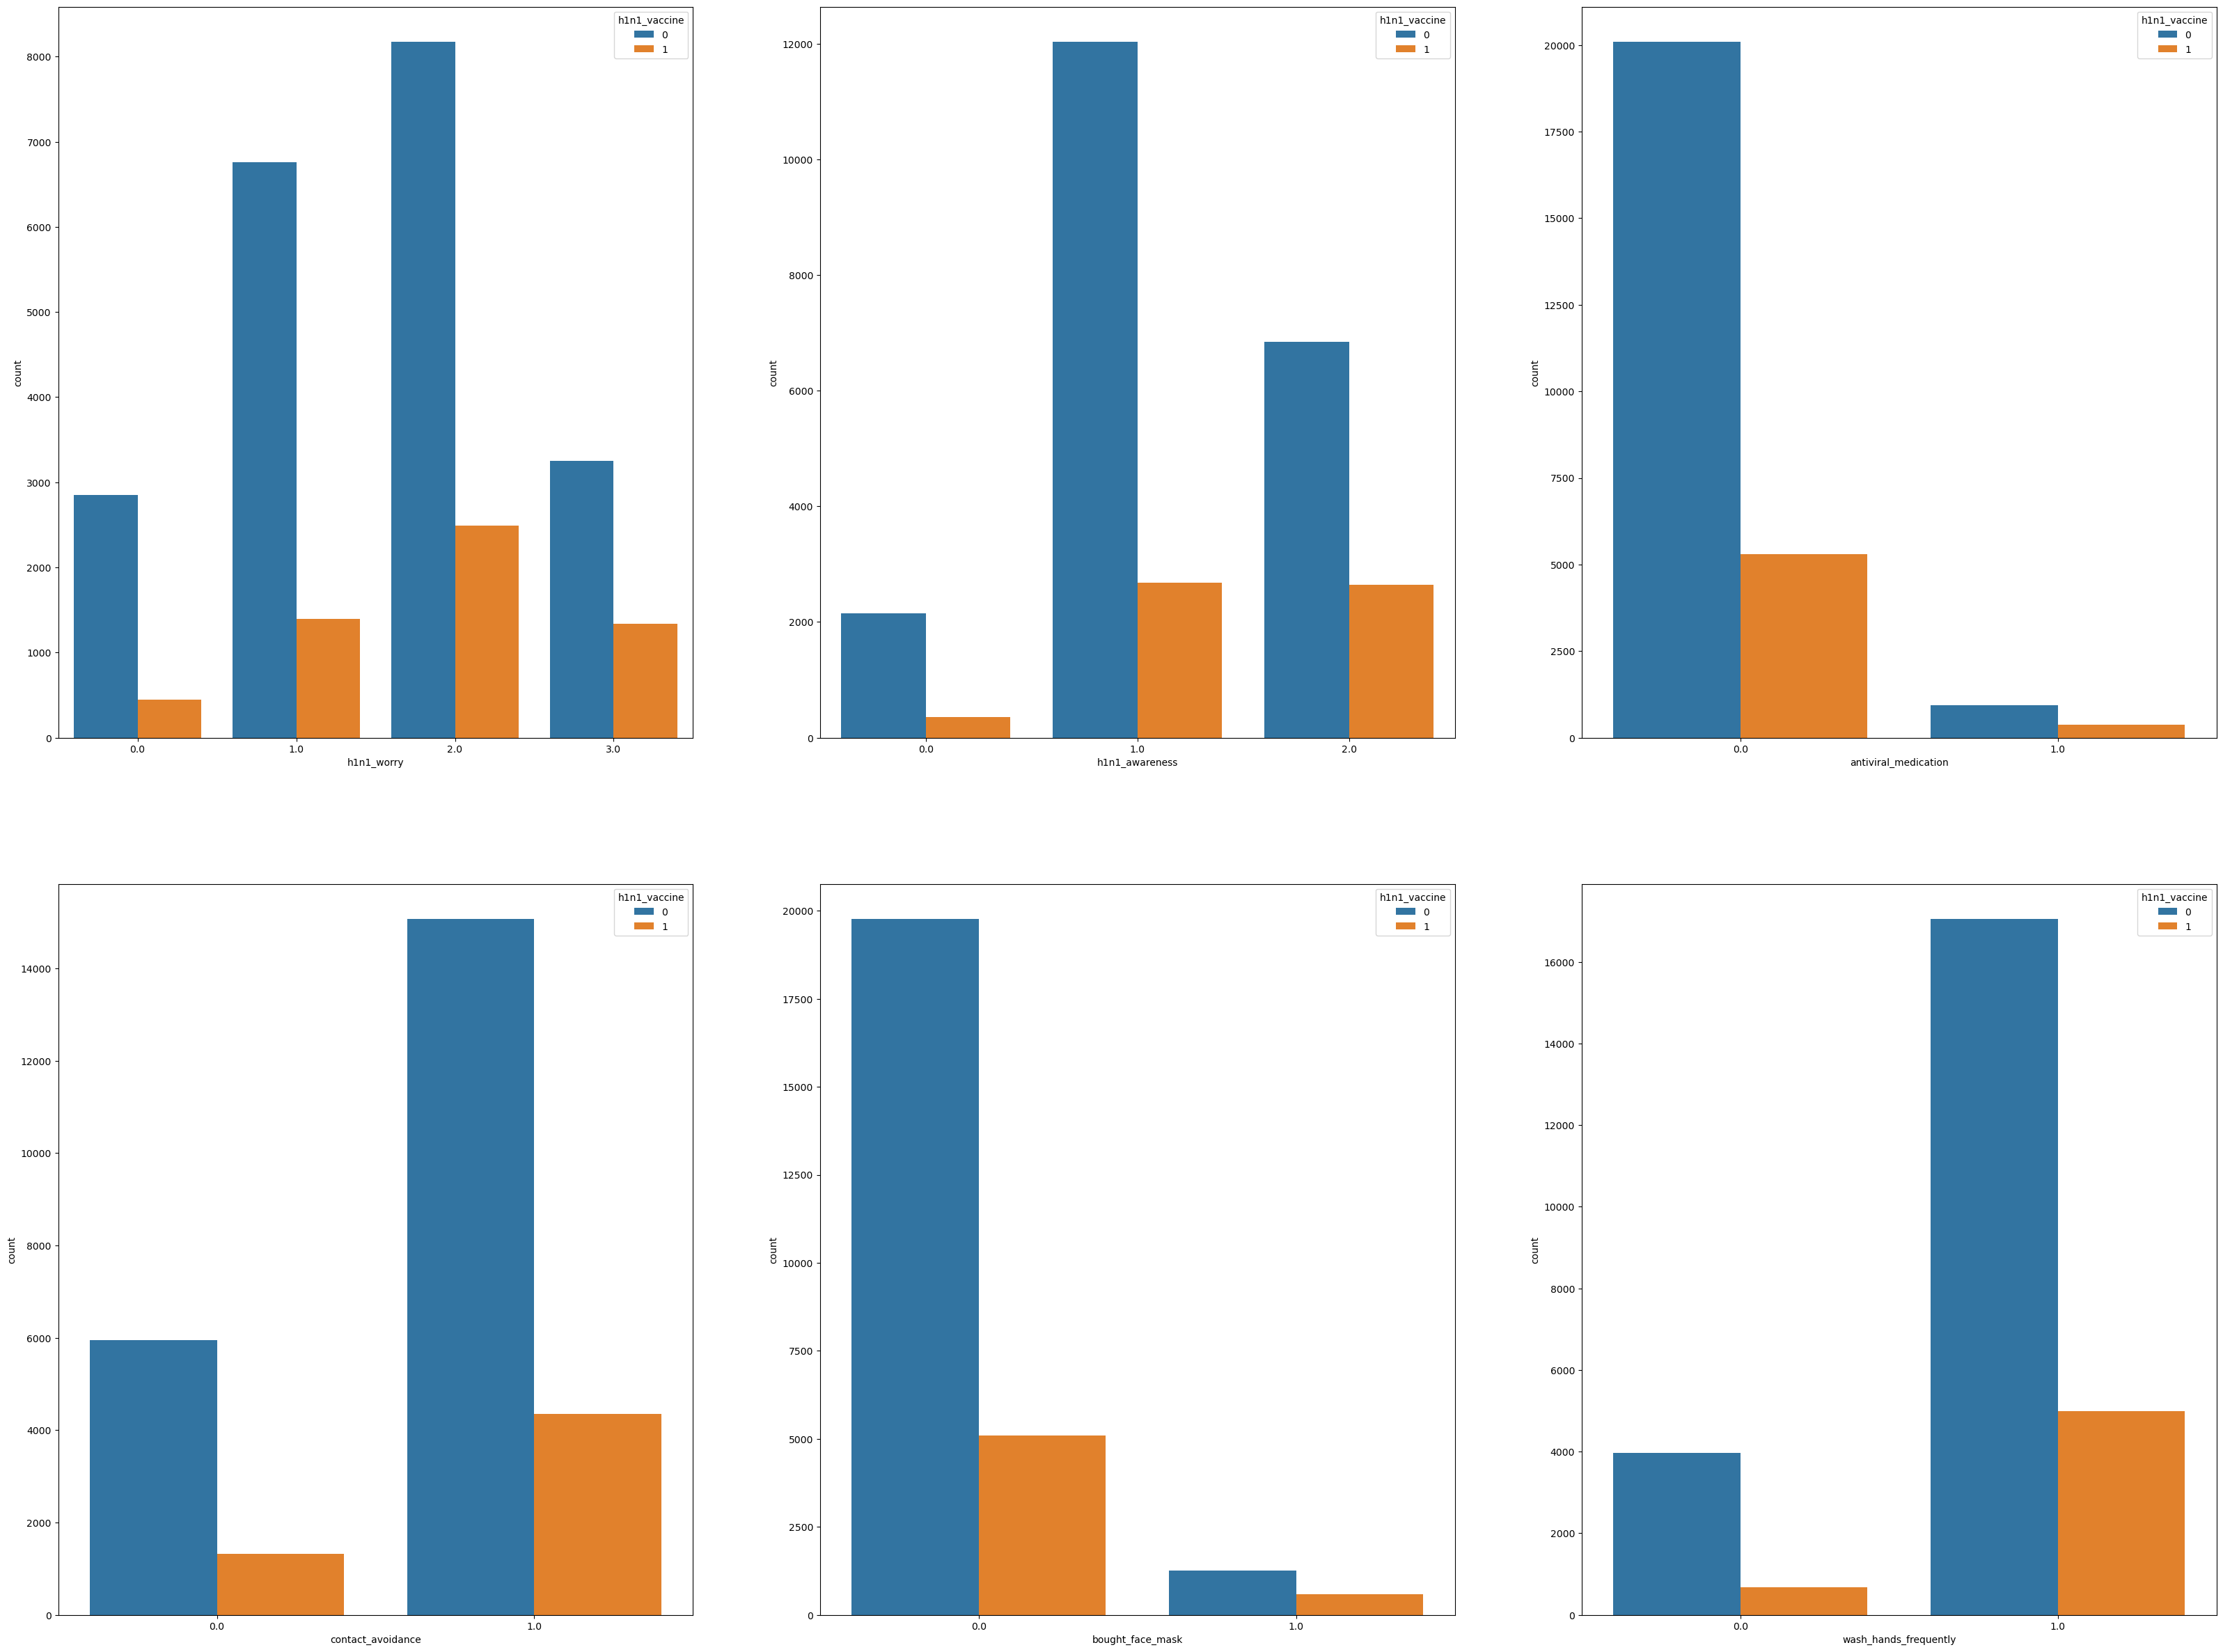

In [21]:
## lets analyse the impact of each of the above variable on the target variable 

fig,ax = plt.subplots(2,3,figsize=(40,30))

sns.countplot(x='h1n1_worry',hue='h1n1_vaccine',data=data,ax=ax[0][0])
sns.countplot(x='h1n1_awareness',hue='h1n1_vaccine',data=data,ax=ax[0][1])
sns.countplot(x='antiviral_medication',hue='h1n1_vaccine',data=data,ax=ax[0][2])
sns.countplot(x='contact_avoidance',hue='h1n1_vaccine',data=data,ax=ax[1][0])
sns.countplot(x='bought_face_mask',hue='h1n1_vaccine',data=data,ax=ax[1][1])
sns.countplot(x='wash_hands_frequently',hue='h1n1_vaccine',data=data,ax=ax[1][2])

<Axes: xlabel='antiviral_medication', ylabel='count'>

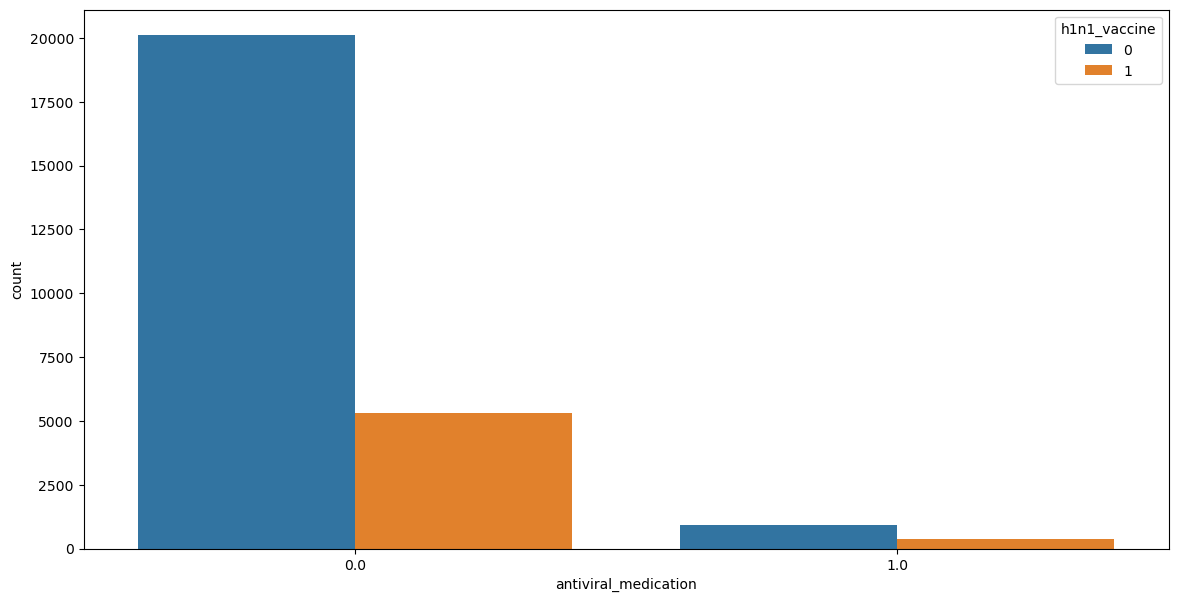

In [22]:
plt.figure(figsize =(14,7))
sns.countplot(x="antiviral_medication",hue="h1n1_vaccine",data = data)

In [23]:
x = data.drop(columns = ["h1n1_vaccine"])
y = data["h1n1_vaccine"]

In [24]:
#Train Test split
x_train,x_test,y_train,y_test = train_test_split(x,y,test_size =0.20,random_state = 20)

In [25]:
x_train.shape,x_test.shape,y_train.shape,y_train.shape

((21365, 27), (5342, 27), (21365,), (21365,))

In [26]:
## Build logistic model 
from sklearn.linear_model import LogisticRegression
log_reg = LogisticRegression()
log_reg.fit(x_train,y_train)

LogisticRegression()

In [27]:
## Making a prediction 
pred = log_reg.predict(x_test)

In [36]:
### Evaluation

from sklearn.metrics import accuracy_score,confusion_matrix, roc_auc_score,f1_score

print('Accuracy score', accuracy_score(y_test,pred))
print('F1_score', f1_score(y_test,pred))
print('AUC score', roc_auc_score(y_test,pred))

Accuracy score 0.7623847104687649
F1_score 0.7564564857226391
AUC score 0.7622377686870055


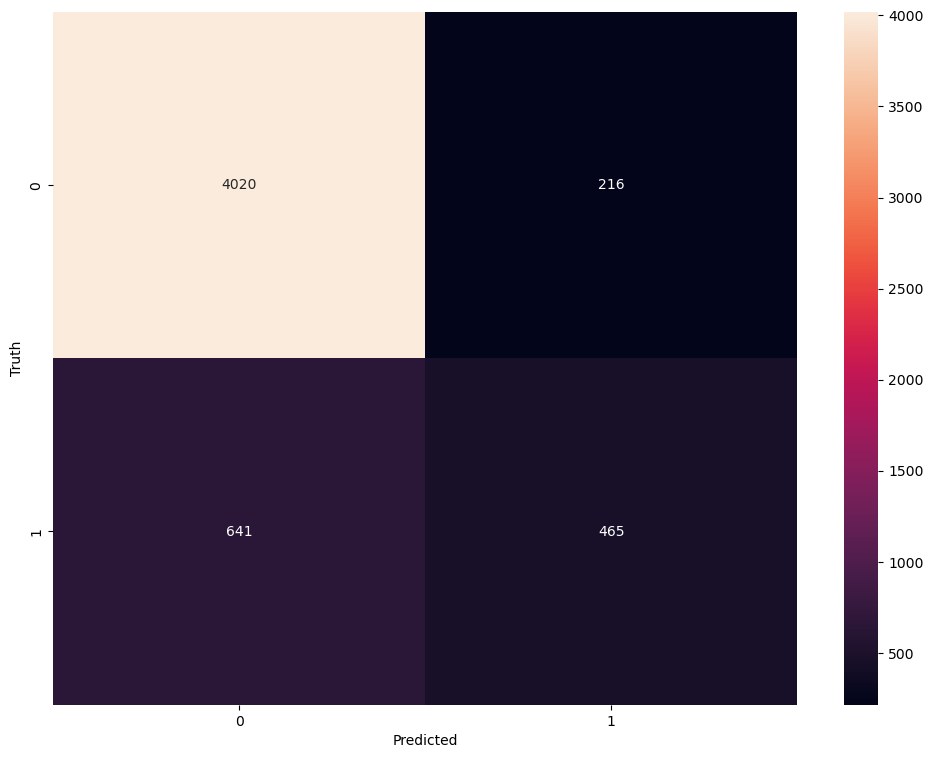

In [29]:
# Confusion Matrix

cm = confusion_matrix(y_test,pred)

plt.figure(figsize = (12,9))
sns.heatmap(cm,annot = True, fmt = 'd')
plt.xlabel('Predicted')
plt.ylabel('Truth')

plt.show()


## Balancing the Data using SMOTE

In [30]:
from imblearn.over_sampling import SMOTE

sm = SMOTE(random_state = 23)
x_sm,y_sm= sm.fit_resample(x,y)

In [35]:
from sklearn.model_selection import train_test_split

x_train, x_test, y_train, y_test = train_test_split(x_sm, y_sm, test_size = 0.25, random_state = 23)

In [32]:
model = LogisticRegression()
model.fit(x_train, y_train)

LogisticRegression()

In [33]:
# making predection on test data
pred =model.predict(x_test)

In [34]:
# Evaluation

from sklearn.metrics import accuracy_score,confusion_matrix, roc_auc_score,f1_score

print('Accuracy score', accuracy_score(y_test,pred))
print('F1_score', f1_score(y_test,pred))
print('AUC score', roc_auc_score(y_test,pred))

Accuracy score 0.7623847104687649
F1_score 0.7564564857226391
AUC score 0.7622377686870055
